In [1]:
##Reading the data
import pandas as pd
import numpy as np
import os

pd.set_option('display.max_colwidth',1000)
#print(os.listdir(".."))
dtrain = pd.read_csv('train.csv', sep = ',')
dtest = pd.read_csv('test.csv', sep=',')
ddata = dtrain.append(dtest)
ddata.reset_index(drop=True, inplace=True) #To rebuild index
Submission = pd.DataFrame()
Submission['PassengerId'] = dtest['PassengerId']


In [2]:
# ##Describing the data numerically
# dtrain.describe(include='all')
# print(dtrain.columns)
# print(dtest.columns)
# print(dtrain['SibSp'].value_counts())
# #dtrain.head(10)
# print(dtrain.isnull().values.any())
# for col in ddata.isnull().columns.values.tolist():
#     if ddata.isnull()[col].any():
#         print(col , '\n' , ddata.isnull()[col].value_counts(), '\n')
# print(dtrain.shape)
# print(dtrain.dtypes)
# print(dtrain.info())
# print(pd.isnull(dtrain).sum())

In [2]:
# #Exploration of data graphically
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# #Survival by Age,Class, Gender
# grid = sns.FacetGrid(dtrain, col='Pclass', row='Sex', hue='Survived', palette='seismic')
# grid = grid.map(plt.scatter, 'PassengerId','Age')
# grid.add_legend()
# grid

# #Survival by Age,Port of Embarkation, Gender
# grid = sns.FacetGrid(dtrain, col='Embarked', row='Sex', hue='Survived',  palette='seismic')
# grid = grid.map(plt.scatter, 'PassengerId', 'Age')
# grid.add_legend()
# grid

# #Survival by Age, Number of Siblings and Gender
# grid = sns.FacetGrid(dtrain, col='SibSp', row='Sex', hue='Survived', palette = 'seismic')
# grid = grid.map(plt.scatter, 'PassengerId', 'Age')
# grid.add_legend()
# grid

# #Survival by Age, Number of parch and Gender
# grid = sns.FacetGrid(dtrain, col = "Parch", row = "Sex", hue = "Survived", palette = 'seismic')
# grid = grid.map(plt.scatter, "PassengerId", "Age")
# grid.add_legend()
# grid

# #Pairplots
# g = sns.pairplot(dtrain[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked']], hue='Survived', 
#                  palette = 'seismic',size=4,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=50) )
# g.set(xticklabels=[])


In [3]:
#Creating simple model
from sklearn.model_selection import (cross_val_score,cross_val_predict,cross_validate,train_test_split,
GridSearchCV,KFold,learning_curve,RandomizedSearchCV,StratifiedKFold)
from sklearn.svm import SVC, LinearSVC

NUMERIC_COLUMNS=['Pclass','Age','SibSp','Parch','Fare']
#To train and test with only the above columns as predictors
#Filling each NaN values with 0 in the stated columns
dtest01 = dtest[NUMERIC_COLUMNS].fillna(0)
dtrain01 = dtrain[NUMERIC_COLUMNS].fillna(0)
target01 = dtrain['Survived']
x_train,x_test,y_train,y_test = train_test_split(dtrain01, target01, test_size=0.3, random_state=2, stratify = target01)

#Fitting model on SVC 
clf = SVC()
clf.fit(x_train,y_train)
# Print the accuracy
print("Accuracy: {}".format(clf.score(x_test, y_test)))

#predicting values
Submission['Survived'] = clf.predict(dtest01)
print(Submission.head())

#Create index and write to csv file
Submission.set_index('PassengerId', inplace=True)
Submission.to_csv('basic_model.csv', sep=',' )


Accuracy: 0.6604477611940298
   PassengerId  Survived
0          892         0
1          893         0
2          894         1
3          895         0
4          896         0


In [4]:
# Filling missing values for fare
# Boxplots for visual exploration
# fig, (ax1,ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,6))
# sns.boxplot(x= 'Pclass', y='Fare', data=dtrain, ax=ax1)
# sns.boxplot(x='Embarked', y='Fare', data=dtrain, ax=ax2)
# plt.show()

# Querying null values
print(ddata[ddata["Fare"].isnull()])
print(dtest[dtest["Fare"].isnull()])
# print(ddata[ddata['PassengerId']==1044])

# filling missing values based on median score of the feature embarked
# embarked = ['S','C','Q']
# for port in embarked:
#     fare_to_fill = ddata.groupby('Embarked')['Fare'].median()[embarked.index(port)]
#     ddata.loc[(ddata['Fare'].isnull()) & (ddata['Embarked']==port), 'Fare'] = fare_to_fill
# dtrain['Fare'] = ddata['Fare'][:891]
# dtest['Fare'] = ddata['Fare'][891:]
# print(ddata[ddata['PassengerId']==1044])

#filling missing values based on mean fare of that Pclass
for x in range(len(dtest['Fare'])):
    if pd.isnull(dtest['Fare'][x]):
        pclass = dtest['Pclass'][x]
        dtest['Fare'][x] = round(dtest[dtest['Pclass'] == pclass]['Fare'].mean(),8)
for x in range(len(ddata['Fare'])):
    if pd.isnull(ddata['Fare'][x]):
        pclass = ddata['Pclass'][x]
        ddata['Fare'][x] = round(ddata[ddata['Pclass'] == pclass]['Fare'].mean(),8)
print(ddata[ddata["Fare"].isnull()])
print(dtest[dtest["Fare"].isnull()])



       Age Cabin Embarked  Fare                Name  Parch  PassengerId  \
1043  60.5   NaN        S   NaN  Storey, Mr. Thomas      0         1044   

      Pclass   Sex  SibSp  Survived Ticket  
1043       3  male      0       NaN   3701  
     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  
Empty DataFrame
Columns: [Age, Cabin, Embarked, Fare, Name, Parch, PassengerId, Pclass, Sex, SibSp, Survived, Ticket]
Index: []
Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


C:\Users\shail\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\shail\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [192]:
# print(ddata[ddata["PassengerId"] == 153]) #TO retrieve a specific row
# print(ddata["Ticket"][152]) #To retrice a specific value
# print(dtest[dtest['Pclass'] == 3]['Fare'].mean()) #Finding fare mean of a specific class
# print(dtest.groupby('Pclass')['Fare'].mean()[3]) #Finding fare mean of a specific class groupby
# ddata.set_index('PassengerId', inplace= True)#To set index to a specific column
# ddata.reset_index(drop=True, inplace=True) #To rebuild index
# print(ddata[ddata["PassengerId"] == 153].index) #Gives index number for a specific row
# print(ddata["Ticket"][152].index) #Gives the index list or index type

In [5]:
#Feature Engineering(creating new features)

#Creating FareBand(Fare categorized in to bins)
ddata['FareBand'] = pd.qcut(ddata['Fare'],8,labels=[1,2,3,4,5,6,7,8]).astype('int')
dtest['FareBand'] = pd.qcut(dtest['Fare'],8,labels=[1,2,3,4,5,6,7,8]).astype('int')
dtrain['FareBand'] = pd.qcut(dtrain['Fare'],8,labels=[1,2,3,4,5,6,7,8]).astype('int')
#print(dtrain[['FareBand','Survived']].groupby(['FareBand'], as_index=False).mean())
print('FareBand feature created')

#Turning Embarked in to numerical variable
embarked_mapping = {'S':1, 'C':2, 'Q':3}
ddata['Embarked'] = ddata['Embarked'].map(embarked_mapping)
dtest['Embarked'] = dtest['Embarked'].map(embarked_mapping)
dtrain['Embarked'] = dtrain['Embarked'].map(embarked_mapping)
#print(dtrain[['Embarked','Survived']].groupby('Embarked', as_index=False).mean())
print('Embarked turned to a numerical variable')


FareBand feature created
Embarked turned to a numerical variable


In [6]:
# print(dtrain[['FareBand','Fare']].groupby(['FareBand'], as_index=False).min())#to find min fare for all categoris in Fareband
# print(dtrain[['FareBand','Fare']].groupby(['FareBand'], as_index=False).max())#to find max fare for all categoris in Fareband
# ddata[ddata.FareBand.notnull()].FareBand.unique().tolist()#To exclude null values and create a list
# ddata.FareBand.unique()#To find unique values

#Filling missing values for Embarked
print(ddata['Embarked'].isnull().value_counts())
print(ddata[ddata['Embarked'].isnull()])

fareband = ddata[ddata.FareBand.notnull()].FareBand.unique().tolist()
for fare in fareband:
    #print(fare, ddata.groupby('FareBand')['Embarked'].median()[fare])
    embark_to_fill = ddata.groupby('FareBand')['Embarked'].median()[fare]
#     print(embark_to_fill)
    ddata.loc[(ddata['Embarked'].isnull()) & (ddata['FareBand'] == fare), 'Embarked'] = embark_to_fill
dtrain["Embarked"] = ddata['Embarked'][:891]
dtest["Embarked"][0:] = ddata['Embarked'][891:]
print('Missing values of Embarked are taken care')
print(ddata['Embarked'].isnull().value_counts())
print(dtrain['Embarked'].isnull().value_counts())



False    1307
True        2
Name: Embarked, dtype: int64
      Age Cabin  Embarked  Fare                                       Name  \
61   38.0   B28       NaN  80.0                        Icard, Miss. Amelie   
829  62.0   B28       NaN  80.0  Stone, Mrs. George Nelson (Martha Evelyn)   

     Parch  PassengerId  Pclass     Sex  SibSp  Survived  Ticket  FareBand  
61       0           62       1  female      0       1.0  113572         8  
829      0          830       1  female      0       1.0  113572         8  
Missing values of Embarked are taken care
False    1309
Name: Embarked, dtype: int64
False    891
Name: Embarked, dtype: int64


C:\Users\shail\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
#Creating gender feature using dummies(adding columns)
dummies=pd.get_dummies(dtrain[['Sex']], prefix_sep='_') #Gender
dtrain = pd.concat([dtrain, dummies], axis=1) 
testdummies=pd.get_dummies(dtest[['Sex']], prefix_sep='_') #Gender
dtest = pd.concat([dtest, testdummies], axis=1) 
print('Gender Feature added ')
#dtrain.drop(['Sex_female','Sex_male'],axis=1,inplace = True) #To drop columns

#Turning Gender into a numerical value
gender = {'female':0, 'male':1}
ddata['Sex'] = ddata['Sex'].map(gender)
ddata['Sex'] = ddata['Sex'].astype('int')
dtrain['Sex'] = ddata['Sex'][:891]
dtest['Sex'][0:] = ddata['Sex'][891:]
print('Gender Category tuned in to numerical value')

Gender Feature added 
Gender Category tuned in to numerical value


C:\Users\shail\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
#Extracting Title from names
ddata["Title"] = ddata.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
#Replacing titles of same class with common title
ddata["Title"] = ddata["Title"].replace('Mlle', 'Miss')
ddata["Title"] = ddata["Title"].replace('Master', 'Master')
ddata["Title"] = ddata["Title"].replace(['Mme', 'Dona', 'Ms'], 'Mrs')
ddata["Title"] = ddata["Title"].replace(['Jonkheer','Don'],'Mr')
ddata["Title"] = ddata["Title"].replace(['Capt','Major', 'Col','Rev','Dr'], 'Military')
ddata["Title"] = ddata["Title"].replace(['Lady', 'Countess','Sir'], 'Honor')
#Copying title data to other dataframes
dtrain["Title"] = ddata['Title'][:891]
dtest['Title'] = pd.Series()
dtest["Title"][0:] = ddata['Title'][891:]
# Converting Title categories to Columns
titledummies=pd.get_dummies(dtrain[['Title']], prefix_sep='_')
dtrain = pd.concat([dtrain, titledummies], axis=1) 
ttitledummies=pd.get_dummies(dtest[['Title']], prefix_sep='_')
dtest = pd.concat([dtest, ttitledummies], axis=1) 
print('Title categories added')

# Mapping titles
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Military": 5, "Honor": 6}
ddata["TitleCat"] = ddata['Title'].map(title_mapping)
ddata["TitleCat"] = ddata["TitleCat"].astype(int)
dtrain["TitleCat"] = dtrain['Title'].map(title_mapping)
dtrain["TitleCat"] = dtrain["TitleCat"].astype(int)
dtest["TitleCat"] = dtest['Title'].map(title_mapping)
dtest["TitleCat"] = dtest["TitleCat"].astype(int)
print('Title Category created')
#ddata['TitleCat'].fillna(5.0)


Title categories added
Title Category created


C:\Users\shail\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [13]:
# #Visualizing age with respect to Title
# sns.boxplot(data = dtrain, x = "Title", y = "Age");

# # Visualise Age Data 
# fig, (axis1,axis2) = plt.subplots(1,2,sharey=True, figsize=(15,4))
# axis1.set_title('Training Age values - Titanic')
# axis2.set_title('Test Age values - Titanic')

# # plot original Age values
# dtrain['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# dtest['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
        
# # plot new Age Values
# dtrain['Age'].hist(bins=70, ax=axis2)
# dtest['Age'].hist(bins=70, ax=axis2)

# # peaks for survived/not survived passengers by their age
# facet = sns.FacetGrid(dtrain, hue="Survived",palette = 'seismic',aspect=4)
# facet.map(sns.kdeplot,'Age',shade= True)
# facet.set(xlim=(0, dtrain['Age'].max()))
# facet.add_legend()

In [9]:
#Filling missing age on the basis of titles
ddata[ddata['Age'].isnull()]
ddata['Age'].isnull().value_counts()
titles = ddata.Title.unique().tolist()
for title in titles:
    age_to_fill = ddata.groupby('Title')['Age'].median()[title]
    ddata.loc[(ddata['Age'].isnull()) & (ddata['Title']==title), 'Age'] = age_to_fill

#Filling missing values of age in dtrain and dtest with ddata values
dtrain['Age']=ddata['Age'][:891]
dtest['Age'][0:]=ddata['Age'][891:]
ddata['Age'].isnull().value_counts()

#map Age values into groups of numerical values
ddata["AgeBand"] = pd.qcut(ddata['Age'], 8, labels = [1, 2, 3, 4,5,6,7,8]).astype('int')
dtrain["AgeBand"] = pd.qcut(dtrain['Age'], 8, labels = [1, 2, 3, 4,5,6,7,8]).astype('int')
dtest["AgeBand"] = pd.qcut(dtest['Age'], 8, labels = [1, 2, 3, 4,5,6,7,8]).astype('int')
print(dtrain[["AgeBand", "Survived"]].groupby(["AgeBand"], as_index=False).mean())
print('AgeBand feature created')

   AgeBand  Survived
0        1  0.538462
1        2  0.383117
2        3  0.371429
3        4  0.227723
4        5  0.400000
5        6  0.523810
6        7  0.394737
7        8  0.365385
AgeBand feature created


C:\Users\shail\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
#Creating Lone traveller feature
dtrain['Alone'] = np.where(dtrain['SibSp'] + dtrain['Parch'] + 1 == 1, 1,0)# People travelling alone
dtest["Alone"] = np.where(dtest['SibSp'] + dtest['Parch'] + 1 == 1, 1,0)
print('Lone traveller feature created')

#Creating family size feature
dtrain["FamilySize"] = (dtrain['SibSp'] + dtrain['Parch'] + 1)
dtest["FamilySize"] = dtest['SibSp'] + dtest['Parch'] + 1
print('Family size feature created')

#Creating cabin feature
ddata['HadCabin'] = ddata['Cabin'].notnull().astype('int')
dtrain['HadCabin'] = dtrain['Cabin'].notnull().astype('int')
dtest['HadCabin'] = dtest['Cabin'].notnull().astype('int')
print('Cabin feature created')

#Creating Deck feature
ddata["Deck"] = ddata.Cabin.str.extract('([A-Za-z])', expand=False)
ddata["Deck"] = ddata["Deck"].fillna("N")
deck_mapping = {"N":0,"A": 1, "B": 2, "C": 3, "D": 4, "E": 5}
ddata['Deck'] = ddata['Deck'].map(deck_mapping)
dtrain["Deck"] = ddata["Deck"][:891]
dtest['Deck']=pd.Series()
dtest["Deck"][0:] = ddata["Deck"][891:]
print('Deck feature created')


Lone traveller feature created
Family size feature created
Cabin feature created
Deck feature created


C:\Users\shail\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
# Creating Family Survival Feature
# get last name
ddata["Last_Name"] = ddata['Name'].apply(lambda x: str.split(x, ",")[0])
# Set survival value
DEFAULT_SURVIVAL_VALUE = 0.5
ddata["Family_Survival"] = DEFAULT_SURVIVAL_VALUE

# Finding Families by grouping with Last name and Fare and setting family_survival if somebody from their family survived
for grp, grp_df in ddata[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
        if (len(grp_df) != 1):
        # A Family group is found.
            for ind, row in grp_df.iterrows():
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    ddata.loc[ddata['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    ddata.loc[ddata['PassengerId'] == passID, 'Family_Survival'] = 0

print("Number of passengers with family survival information:", ddata.loc[ddata['Family_Survival']!=0.5].shape[0])

# Finding Families by grouping with Ticket and setting family_survival if somebody from their family survived
for _, grp_df in ddata.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    ddata.loc[ddata['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    ddata.loc[ddata['PassengerId'] == passID, 'Family_Survival'] = 0
                        
print("Number of passenger with family/group survival information: " +str(ddata[ddata['Family_Survival']!=0.5].shape[0]))

# Family_Survival in df_train and df_test:
dtrain["Family_Survival"] = ddata['Family_Survival'][:891]
dtest['Family_Survival'] = pd.Series()
dtest["Family_Survival"][0:] = ddata['Family_Survival'][891:]


Number of passengers with family survival information: 420
Number of passenger with family/group survival information: 546


C:\Users\shail\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
# #Exploring the newly created features and the data avaialable as a whole
print(pd.isnull(dtest).sum())
# dtrain.describe()
# #grouping data by title
# print(dtrain[['Title','Survived']].groupby(['Title'], as_index=False).mean())
# #Visualing Age data
# facet = sns.FacetGrid(data = dtrain, hue='Title', legend_out=True, size=5)
# facet = facet.map(sns.kdeplot, "Age")
# facet.add_legend()

# #Plotting surivival by FareBand and Gender
# grid = sns.FacetGrid(dtrain, col = "FareBand", row = "Sex", hue = "Survived", palette = 'seismic')
# grid = grid.map(plt.scatter, "PassengerId", "Age")
# grid.add_legend()
# grid

# #Survival by Deck and Gender
# grid = sns.FacetGrid(dtrain, col = "Deck", row = "Sex", hue = "Survived", palette = 'seismic')
# grid = grid.map(plt.scatter, "PassengerId", "Age")
# grid.add_legend()
# grid

# #Survival by Family Size and Gender
# grid = sns.FacetGrid(dtrain, col = "FamilySize", row = "Sex", hue = "Survived", palette = 'seismic')
# grid = grid.map(plt.scatter, "PassengerId", "Age")
# grid.add_legend()
# grid

# #Survival by Passenger Class and Family Size
# x1=dtrain[dtrain["Survived"]==0]
# x2=dtrain[dtrain["Survived"]==1]
# #Set up the matplotlib figure
# plt.figure(1)
# sns.jointplot(x="FamilySize", y="Pclass", data=x1, kind="kde", color='b');
# plt.figure(2)
# sns.jointplot(x="FamilySize", y="Pclass", data=x2, kind="kde", color='r');
# plt.show()
# #
# plt.figure(3)
# sns.jointplot(data=x1, x='PassengerId', y='Age', kind='scatter',color='b')
# plt.figure(4)
# sns.jointplot(data=x2, x='PassengerId', y='Age', kind='scatter',color='r')

PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              327
Embarked             0
FareBand             0
Sex_female           0
Sex_male             0
Title                0
Title_Master         0
Title_Military       0
Title_Miss           0
Title_Mr             0
Title_Mrs            0
TitleCat             0
AgeBand              0
Alone                0
FamilySize           0
HadCabin             0
Deck                 9
Family_Survival      0
dtype: int64


In [13]:
#Retraining the model
from sklearn.ensemble import (AdaBoostClassifier, ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier)
# Re-evaluate with new features
REVISED_NUMERIC_COLUMNS=['Pclass','Age','SibSp','Parch','Family_Survival','Alone','Sex_female','Sex_male',
                         'Title_Master', 'Title_Miss','Title_Mr', 'Title_Mrs', 'Title_Military','Embarked']

# create test and training data
test = dtest[REVISED_NUMERIC_COLUMNS].fillna(-1000)
data_to_train = dtrain[REVISED_NUMERIC_COLUMNS].fillna(-1000)
X_train, X_test, y_train, y_test = train_test_split(data_to_train, dtrain['Survived'], test_size=0.3,random_state=21, stratify=dtrain['Survived'])

RandomForest = RandomForestClassifier(random_state = 0)
RandomForest.fit(X_train, y_train)
print('Evaluation complete')

#Predicting values
Submission['Survived']=RandomForest.predict(test)
print("Accuracy: {}".format(RandomForest.score(X_test, y_test)))
print(Submission.head())
print('Submission created')
# Submission.set_index('PassengerId', inplace=True)
# Submission.to_csv('submission01.csv',sep=',')


# #Finding feature importance
# RandomForest_checker = RandomForestClassifier()
# RandomForest_checker.fit(X_train, y_train)
# importances_df = pd.DataFrame(RandomForest_checker.feature_importances_, columns=['Feature_Importance'],
#                               index=X_train.columns)
# importances_df.sort_values(by=['Feature_Importance'], ascending=False, inplace=True)
# print(importances_df)

# #mapping feature correlation
# f,ax = plt.subplots(figsize=(12, 12))
# sns.heatmap(dtrain.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)


Evaluation complete
Accuracy: 0.8134328358208955
             Survived
PassengerId          
892                 0
893                 0
894                 0
895                 0
896                 1
Submission created


In [14]:
# Trying machine learning with different models

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Splitting data in to training and test sets
REVISED_NUMERIC_COLUMNS=['Pclass','Age','SibSp','Parch','Family_Survival','Alone','Sex_female','Sex_male',
                         'Title_Master', 'Title_Miss','Title_Mr', 'Title_Mrs', 'Title_Military','Embarked']

data_to_train = dtrain[REVISED_NUMERIC_COLUMNS]
prediction = dtrain["Survived"]
test = dtest[REVISED_NUMERIC_COLUMNS]
x_train, x_test, y_train, y_test = train_test_split(data_to_train, prediction, test_size = 0.3,random_state=21, 
                                                   stratify=prediction)

# To store model values in a data frame
models = pd.DataFrame(columns=('Model','Accuracy','Precision','Recall'))

#Support Vector Machines
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import (accuracy_score,auc,classification_report,confusion_matrix,
mean_squared_error, precision_score, recall_score,roc_curve)
# instanciate model
clf = SVC()
# fit model
clf.fit(x_train, y_train)
# predict results
y_pred = clf.predict(x_test)
# check accuracy
acc_clf = round(accuracy_score(y_pred, y_test) * 100, 2)
pre_clf = round(precision_score(y_pred,y_test) * 100, 2)
rec_clf = round(recall_score(y_pred,y_test) * 100, 2)
#print accuracy
print("SVC: \t\t\t\tAccuracy: {}\t Precision: {}\t Recall: {}". format(acc_clf,pre_clf,rec_clf))
s = pd.Series(['SVC', acc_clf,pre_clf,rec_clf ], index=['Model','Accuracy','Precision','Recall'])
models = models.append(s, ignore_index=True)


#Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)
acc_clf = round(accuracy_score(y_pred, y_test) * 100, 2)
pre_clf = round(precision_score(y_pred,y_test) * 100, 2)
rec_clf = round(recall_score(y_pred,y_test) * 100, 2)
print("Linear SVC: \t\t\tAccuracy: {}\t Precision: {}\t Recall: {}". format(acc_clf,pre_clf,rec_clf))
s = pd.Series(['Linear SVC', acc_clf,pre_clf,rec_clf ], index=['Model','Accuracy','Precision','Recall'])
models = models.append(s, ignore_index=True)

# Logistic Regression
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_clf = round(accuracy_score(y_pred, y_test) * 100, 2)
pre_clf = round(precision_score(y_pred,y_test) * 100, 2)
rec_clf = round(recall_score(y_pred,y_test) * 100, 2)
print("Logistic Regression: \t\tAccuracy: {}\t Precision: {}\t Recall: {}". format(acc_clf,pre_clf,rec_clf))
s = pd.Series(['Logistic Regression', acc_clf,pre_clf,rec_clf ], index=['Model','Accuracy','Precision','Recall'])
models = models.append(s, ignore_index=True)

# Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)
acc_clf = round(accuracy_score(y_pred, y_test) * 100, 2)
pre_clf = round(precision_score(y_pred,y_test) * 100, 2)
rec_clf = round(recall_score(y_pred,y_test) * 100, 2)
print("Perceptron: \t\t\tAccuracy: {}\t Precision: {}\t Recall: {}". format(acc_clf,pre_clf,rec_clf))
s = pd.Series(['Perceptron', acc_clf,pre_clf,rec_clf ], index=['Model','Accuracy','Precision','Recall'])
models = models.append(s, ignore_index=True)

# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
acc_clf = round(accuracy_score(y_pred, y_test) * 100, 2)
pre_clf = round(precision_score(y_pred,y_test) * 100, 2)
rec_clf = round(recall_score(y_pred,y_test) * 100, 2)
print("Stochastic Gradient Descent: \tAccuracy: {}\t Precision: {}\t Recall: {}". format(acc_clf,pre_clf,rec_clf))
s = pd.Series(['Stochastic Gradient Descent', acc_clf,pre_clf,rec_clf ], index=['Model','Accuracy','Precision','Recall'])
models = models.append(s, ignore_index=True)

# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_clf = round(accuracy_score(y_pred, y_test) * 100, 2)
pre_clf = round(precision_score(y_pred,y_test) * 100, 2)
rec_clf = round(recall_score(y_pred,y_test) * 100, 2)
print("k-Nearest Neighbors: \t\tAccuracy: {}\t Precision: {}\t Recall: {}". format(acc_clf,pre_clf,rec_clf))
s = pd.Series(['k-Nearest Neighbors', acc_clf,pre_clf,rec_clf ], index=['Model','Accuracy','Precision','Recall'])
models = models.append(s, ignore_index=True)

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
acc_clf = round(accuracy_score(y_pred, y_test) * 100, 2)
pre_clf = round(precision_score(y_pred,y_test) * 100, 2)
rec_clf = round(recall_score(y_pred,y_test) * 100, 2)
print("Gaussian Naive Bayes: \t\tAccuracy: {}\t Precision: {}\t Recall: {}". format(acc_clf,pre_clf,rec_clf))
s = pd.Series(['Gaussian Naive Bayes', acc_clf,pre_clf,rec_clf ], index=['Model','Accuracy','Precision','Recall'])
models = models.append(s, ignore_index=True)

#Decision Trees
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_test)
acc_clf = round(accuracy_score(y_pred, y_test) * 100, 2)
pre_clf = round(precision_score(y_pred,y_test) * 100, 2)
rec_clf = round(recall_score(y_pred,y_test) * 100, 2)
print("Decision Trees: \t\tAccuracy: {}\t Precision: {}\t Recall: {}". format(acc_clf,pre_clf,rec_clf))
s = pd.Series(['Decision Trees', acc_clf,pre_clf,rec_clf ], index=['Model','Accuracy','Precision','Recall'])
models = models.append(s, ignore_index=True)

# Random Forest
from sklearn.ensemble import (AdaBoostClassifier, ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier)
randomforest = RandomForestClassifier(random_state = 0)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
acc_clf = round(accuracy_score(y_pred, y_test) * 100, 2)
pre_clf = round(precision_score(y_pred,y_test) * 100, 2)
rec_clf = round(recall_score(y_pred,y_test) * 100, 2)
print("Random Forest: \t\t\tAccuracy: {}\t Precision: {}\t Recall: {}". format(acc_clf,pre_clf,rec_clf))
s = pd.Series(['Random Forest', acc_clf,pre_clf,rec_clf ], index=['Model','Accuracy','Precision','Recall'])
models = models.append(s, ignore_index=True)

# Gradient Boosting Classifier
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_test)
acc_clf = round(accuracy_score(y_pred, y_test) * 100, 2)
pre_clf = round(precision_score(y_pred,y_test) * 100, 2)
rec_clf = round(recall_score(y_pred,y_test) * 100, 2)
print("Gradient Boosting: \t\tAccuracy: {}\t Precision: {}\t Recall: {}". format(acc_clf,pre_clf,rec_clf))
s = pd.Series(['Gradient Boosting', acc_clf,pre_clf,rec_clf ], index=['Model','Accuracy','Precision','Recall'])
models = models.append(s, ignore_index=True)

# Extra Trees Classifier
et = ExtraTreesClassifier()
et.fit(x_train, y_train)
y_pred = et.predict(x_test)
acc_clf = round(accuracy_score(y_pred, y_test) * 100, 2)
pre_clf = round(precision_score(y_pred,y_test) * 100, 2)
rec_clf = round(recall_score(y_pred,y_test) * 100, 2)
print("Extra Trees: \t\t\tAccuracy: {}\t Precision: {}\t Recall: {}". format(acc_clf,pre_clf,rec_clf))
s = pd.Series(['Extra Trees', acc_clf,pre_clf,rec_clf ], index=['Model','Accuracy','Precision','Recall'])
models = models.append(s, ignore_index=True)

# # xgboost::Module not imported
# from xgboost import XGBClassifier
# xgb = XGBClassifier(n_estimators=10)
# xgb.fit(x_train, y_train)
# y_pred = xgb.predict(x_test)
# acc_clf = round(accuracy_score(y_pred, y_test) * 100, 2)
# pre_clf = round(precision_score(y_pred,y_test) * 100, 2)
# rec_clf = round(recall_score(y_pred,y_test) * 100, 2)
# print("Extra Trees: \t\t\tAccuracy: {}\t Precision: {}\t Recall: {}". format(acc_clf,pre_clf,rec_clf))
# s = pd.Series(['Perceptron', acc_clf,pre_clf,rec_clf ], index=['Model','Accuracy','Precision','Recall'])
# models = models.append(s, ignore_index=True)

# models

# models = pd.DataFrame({
#     'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
#               'Random Forest', 'Naive Bayes', 'Linear SVC', 
#               'Decision Tree', 'Gradient Boosting Classifier','Extra Trees','Stochastic Gradient Descent','Perceptron','xgboost'],
#     'Score': [acc_clf, acc_knn, acc_logreg, 
#               acc_randomforest, acc_gaussian,acc_linear_svc, acc_decisiontree,
#              acc_gbk,acc_et,acc_sgd,acc_perceptron,acc_xgb]})
# models.sort_values(by='Score', ascending=False)

SVC: 				Accuracy: 84.33	 Precision: 70.87	 Recall: 85.88
Linear SVC: 			Accuracy: 84.7	 Precision: 69.9	 Recall: 87.8
Logistic Regression: 		Accuracy: 85.07	 Precision: 71.84	 Recall: 87.06
Perceptron: 			Accuracy: 60.07	 Precision: 82.52	 Recall: 48.85
Stochastic Gradient Descent: 	Accuracy: 81.72	 Precision: 66.02	 Recall: 82.93
k-Nearest Neighbors: 		Accuracy: 82.46	 Precision: 68.93	 Recall: 82.56
Gaussian Naive Bayes: 		Accuracy: 82.09	 Precision: 71.84	 Recall: 79.57
Decision Trees: 		Accuracy: 80.6	 Precision: 70.87	 Recall: 76.84
Random Forest: 			Accuracy: 81.34	 Precision: 70.87	 Recall: 78.49
Gradient Boosting: 		Accuracy: 84.7	 Precision: 75.73	 Recall: 82.98
Extra Trees: 			Accuracy: 82.84	 Precision: 74.76	 Recall: 79.38


In [122]:

# Extra Trees Classifier
bas = pd.Series([ExtraTreesClassifier,GradientBoostingClassifier])
print(bas)
for model in bas:
    et = model()
    et.fit(x_train, y_train)
    y_pred = et.predict(x_test)
    acc_clf = round(accuracy_score(y_pred, y_test) * 100, 2)
    pre_clf = round(precision_score(y_pred,y_test) * 100, 2)
    rec_clf = round(recall_score(y_pred,y_test) * 100, 2)
    print("Model: {}\t\t\tAccuracy: {}\t Precision: {}\t Recall: {}". format(model,acc_clf,pre_clf,rec_clf))
#     s = pd.Series(['Extra Trees', acc_clf,pre_clf,rec_clf ], index=['Model','Accuracy','Precision','Recall'])

from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate,train_test_split,GridSearchCV,KFold,learning_curve,RandomizedSearchCV,StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble, linear_model,neighbors, svm, tree
from scipy.stats import randint

0                     <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
1    <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
dtype: object
Model: <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>			Accuracy: 82.09	 Precision: 72.82	 Recall: 78.95
Model: <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>			Accuracy: 84.33	 Precision: 74.76	 Recall: 82.8


In [26]:
# Hyper Tuning the models
REVISED_NUMERIC_COLUMNS=['Pclass','Age','SibSp','Parch','Family_Survival','FamilySize','Alone','Sex_female','Sex_male',
                         'Title_Master', 'Title_Miss','Title_Mr', 'Title_Mrs', 'Title_Military','Embarked']
# create test and training data
data_to_train01 = dtrain[REVISED_NUMERIC_COLUMNS]
prediction01 = dtrain["Survived"]
x_train01, x_test01, y_train01, y_test01 = train_test_split(data_to_train01, prediction01, test_size = 0.3,
                                                  random_state=21, stratify=prediction01)
print('Data Split')
# To store model values in a data frame
models01 = pd.DataFrame(columns=('Model','Accuracy','Precision','Recall'))

# Support Vector Classifier with GridSearchCV 
param_grid = {'C':np.arange(1, 7),
              'degree':np.arange(1, 7),
              'max_iter':np.arange(0, 12),
              'kernel':['rbf','linear'],
              'shrinking':[0,1]}
clf = SVC()
svc_cv=GridSearchCV(clf, param_grid, cv=10)
svc_cv.fit(x_train01, y_train01)
y_pred01 = svc_cv.predict(x_test01)
print("Tuned SVC Parameters: {}".format(svc_cv.best_params_))
print("Best score is {}".format(svc_cv.best_score_))
acc_clf = round(accuracy_score(y_pred01, y_test01) * 100, 2)
pre_clf = round(precision_score(y_pred01,y_test01) * 100, 2)
rec_clf = round(recall_score(y_pred01,y_test01) * 100, 2)
print("SVC with GridSearch: \t\t\tAccuracy: {}\t Precision: {}\t Recall: {}". format(acc_clf,pre_clf,rec_clf))
s = pd.Series(['SVC with GridSearch', acc_clf,pre_clf,rec_clf ], index=['Model','Accuracy','Precision','Recall'])
models01 = models01.append(s, ignore_index=True)

# Logistic Regression with GridSearchCV 
# create parameter grid as a dictionary where the keys are the hyperparameter names and the values are lists of values that we want to try.
param_grid = {"solver": ['newton-cg','lbfgs','liblinear','sag','saga'],'C': [0.01, 0.1, 1, 10, 100]}
# instanciate classifier
logreg = LogisticRegression()
logreg.fit(x_train01, y_train01)
logreg_cv = GridSearchCV(logreg, param_grid, cv=30)
logreg_cv.fit(x_train01, y_train01)
y_pred01 = logreg_cv.predict(x_test01)
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))
acc_clf = round(accuracy_score(y_pred01, y_test01) * 100, 2)
pre_clf = round(precision_score(y_pred01,y_test01) * 100, 2)
rec_clf = round(recall_score(y_pred01,y_test01) * 100, 2)
print("Logistic Regression with GridSearchCV: \t\t\t\tAccuracy: {}\t Precision: {}\t Recall: {}". format(acc_clf,pre_clf,rec_clf))
s = pd.Series(['Logistic Regression with GridSearchCV', acc_clf,pre_clf,rec_clf ], index=['Model','Accuracy',
                                                                                          'Precision','Recall'])
models01 = models01.append(s, ignore_index=True)

# KNN or k-Nearest Neighbors with GridSearchCV
# create parameter grid as a dictionary where the keys are the hyperparameter names and the values are lists of values that we want to try.
param_grid = {"n_neighbors": np.arange(1, 50),
             "leaf_size": np.arange(20, 40),
             "algorithm": ["ball_tree","kd_tree","brute"]
             }
# instanciate classifier
knn = KNeighborsClassifier()
knn.fit(x_train01, y_train01)
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(x_train01, y_train01)
y_pred01 = knn_cv.predict(x_test01)
print("Tuned knn Parameters: {}".format(knn_cv.best_params_))
print("Best score is {}".format(knn_cv.best_score_))
acc_clf = round(accuracy_score(y_pred01, y_test01) * 100, 2)
pre_clf = round(precision_score(y_pred01,y_test01) * 100, 2)
rec_clf = round(recall_score(y_pred01,y_test01) * 100, 2)
print("KNN  with GridSearchCV: \t\t\t\tAccuracy: {}\t Precision: {}\t Recall: {}". format(acc_clf,pre_clf,rec_clf))
s = pd.Series(['KNN with GridSearchCV', acc_clf,pre_clf,rec_clf ], index=['Model','Accuracy','Precision','Recall'])
models01 = models01.append(s, ignore_index=True)

# DecisionTree with RandomizedSearchCV
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"random_state" :  np.arange(0, 10),
              "max_depth": np.arange(1, 10),
              "max_features": np.arange(1, 10),
              "min_samples_leaf": np.arange(1, 10),
              "criterion": ["gini","entropy"]}
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=30)
# Fit it to the data
tree_cv.fit(x_train01,y_train01)
y_pred01 = tree_cv.predict(x_test01)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))
acc_clf = round(accuracy_score(y_pred01, y_test01) * 100, 2)
pre_clf = round(precision_score(y_pred01,y_test01) * 100, 2)
rec_clf = round(recall_score(y_pred01,y_test01) * 100, 2)
print("DecisionTree with RandomizedSearchCV: \t\t\t\tAccuracy: {}\t Precision: {}\t Recall: {}". format(acc_clf,pre_clf,rec_clf))
s = pd.Series(['DecisionTree with RandomizedSearchCV', acc_clf,pre_clf,rec_clf ], index=['Model','Accuracy','Precision','Recall'])
models01 = models01.append(s, ignore_index=True)

# Random Forest with RandomizedSearchCV
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"random_state" :  np.arange(0, 10),
              "n_estimators" :  np.arange(1, 20),
              "max_depth": np.arange(1, 10),
              "max_features": np.arange(1, 10),
              "min_samples_leaf": np.arange(1, 10),
              "criterion": ["gini","entropy"]}
# Instantiate a Decision Tree classifier: tree
randomforest = RandomForestClassifier()
# Instantiate the RandomizedSearchCV object: tree_cv
randomforest_cv = RandomizedSearchCV(randomforest, param_dist, cv=30)
# Fit it to the data
randomforest_cv.fit(x_train01,y_train01)
y_pred01 = randomforest_cv.predict(x_test01)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(randomforest_cv.best_params_))
print("Best score is {}".format(randomforest_cv.best_score_))
acc_clf = round(accuracy_score(y_pred01, y_test01) * 100, 2)
pre_clf = round(precision_score(y_pred01,y_test01) * 100, 2)
rec_clf = round(recall_score(y_pred01,y_test01) * 100, 2)
print("Random Forest with RandomizedSearchCV: \t\t\t\tAccuracy: {}\t Precision: {}\t Recall: {}". format(acc_clf,pre_clf,rec_clf))
s = pd.Series(['Random Forest with RandomizedSearchCV', acc_clf,pre_clf,rec_clf ], index=['Model','Accuracy','Precision','Recall'])
models01 = models01.append(s, ignore_index=True)

# Gradient Boosting Classifier with RandomizedSearchCV
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'max_depth':np.arange(1, 7),
              'min_samples_leaf': np.arange(1, 6),
              "max_features": np.arange(1, 10),
             }
# Instantiate Classifier
gbk = GradientBoostingClassifier()
# Instantiate the RandomizedSearchCV object: tree_cv
gbk_cv = RandomizedSearchCV(gbk, param_dist, cv=30)
gbk_cv.fit(x_train01, y_train01)
y_pred01 = gbk_cv.predict(x_test01)
print("Tuned Gradient Boost Parameters: {}".format(gbk_cv.best_params_))
print("Best score is {}".format(gbk_cv.best_score_))
acc_clf = round(accuracy_score(y_pred01, y_test01) * 100, 2)
pre_clf = round(precision_score(y_pred01,y_test01) * 100, 2)
rec_clf = round(recall_score(y_pred01,y_test01) * 100, 2)
print("Gradient Boosting Classifier with RandomizedSearchCV: \t\t\t\tAccuracy: {}\t Precision: {}\t Recall: {}". format(acc_clf,pre_clf,rec_clf))
s = pd.Series(['Gradient Boosting Classifier with RandomizedSearchCV', acc_clf,pre_clf,rec_clf ], index=['Model','Accuracy','Precision','Recall'])
models01 = models01.append(s, ignore_index=True)

# # xgboost with RandomizedSearchCV
# # Setup the parameters and distributions to sample from: param_dist
# param_dist = {'learning_rate': [.01, .03, .05, .1, .25], #default: .3
#             'max_depth': np.arange(1, 10), #default 2
#             'n_estimators': [10, 50, 100, 300], 
#             'booster':['gbtree','gblinear','dart']
#             #'seed': 5  
#              }
# # Instantiate Classifier
# xgb = XGBClassifier()
# # Instantiate the RandomizedSearchCV object: tree_cv
# xgb_cv = RandomizedSearchCV(xgb, param_dist, cv=20)
# # Fit model
# xgb_cv.fit(X_train, y_train)
# # Make prediction
# y_pred = xgb_cv.predict(X_val)
# # Print results
# print("xgBoost Parameters: {}".format(xgb_cv.best_params_))
# print("Best score is {}".format(xgb_cv.best_score_))
# acc_clf = round(accuracy_score(y_pred01, y_test01) * 100, 2)
# pre_clf = round(precision_score(y_pred01,y_test01) * 100, 2)
# rec_clf = round(recall_score(y_pred01,y_test01) * 100, 2)
# print("xgboost with RandomizedSearchCV: \t\t\t\tAccuracy: {}\t Precision: {}\t Recall: {}". format(acc_clf,pre_clf,rec_clf))
# s = pd.Series(['xgboost with RandomizedSearchCV', acc_clf,pre_clf,rec_clf ], index=['Model','Accuracy','Precision','Recall'])
# models01 = models01.append(s, ignore_index=True)

#Comparing bestscores of all the models
optmodels = pd.DataFrame({
    'optModel': ['SVC','KNN','Decision Tree','Gradient Boost','Logistic Regression'],
    'optScore': [svc_cv.best_score_,knn_cv.best_score_,tree_cv.best_score_,gbk_cv.best_score_,logreg_cv.best_score_]})
optmodels.sort_values(by='optScore', ascending=False)

# #Comparing accuracy of all the models
# optmodels = pd.DataFrame({
#     'optModel': ['Linear Regression','KNearestNieghbours','Decision Tree','Gradient Boost','Logistic Regression','xgboost'],
#     'optScore': [acc_svc_cv,acc_knn_cv,acc_tree_cv,acc_gbk_cv,acc_logreg_cv,acc_xgb_cv]})
# optmodels.sort_values(by='optScore', ascending=False)

models01

Data Split
Tuned SVC Parameters: {'C': 3, 'degree': 1, 'kernel': 'linear', 'max_iter': 1, 'shrinking': 0}
Best score is 0.6276083467094703
SVC with GridSearch: 			Accuracy: 71.27	 Precision: 67.96	 Recall: 61.4
Tuned Logistic Regression Parameters: {'C': 1, 'solver': 'lbfgs'}
Best score is 0.8539325842696629
Logistic Regression with GridSearchCV: 				Accuracy: 84.33	 Precision: 69.9	 Recall: 86.75
Tuned knn Parameters: {'algorithm': 'kd_tree', 'leaf_size': 32, 'n_neighbors': 9}
Best score is 0.7961476725521669
KNN  with GridSearchCV: 				Accuracy: 78.73	 Precision: 59.22	 Recall: 80.26
Tuned Decision Tree Parameters: {'random_state': 4, 'min_samples_leaf': 9, 'max_features': 3, 'max_depth': 5, 'criterion': 'entropy'}
Best score is 0.8394863563402889
DecisionTree with RandomizedSearchCV: 				Accuracy: 83.96	 Precision: 65.05	 Recall: 90.54
Tuned Decision Tree Parameters: {'random_state': 0, 'n_estimators': 15, 'min_samples_leaf': 2, 'max_features': 4, 'max_depth': 4, 'criterion': 'gini'

,optModel,optScore
4,Logistic Regression,0.853933
3,Gradient Boost,0.845907
2,Decision Tree,0.839486
1,KNN,0.796148
0,SVC,0.627608


NameError: name 'xgb_cv' is not defined

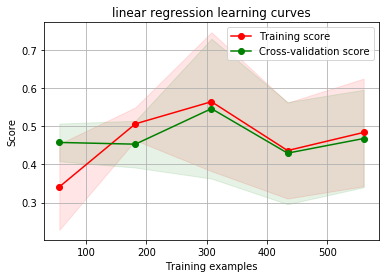

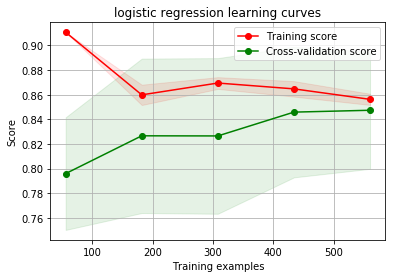

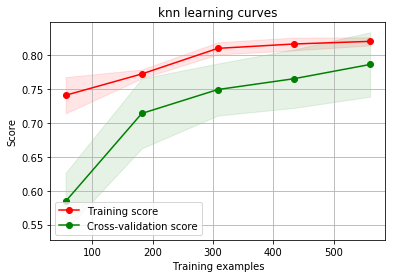

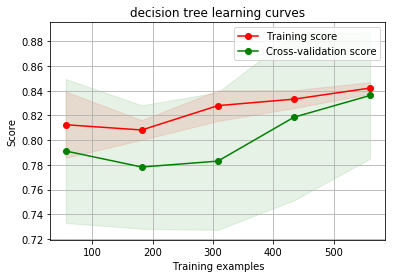

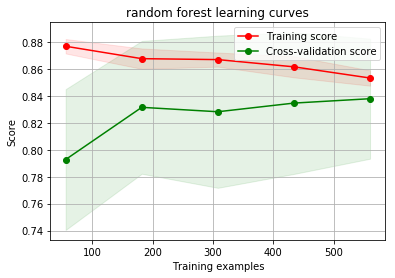

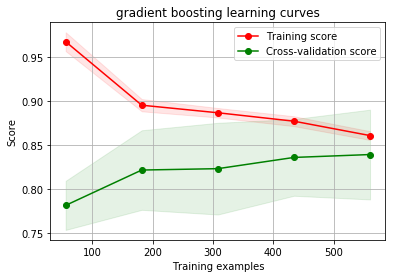

In [27]:
# Plotting Learning curves
# define function to plot test and training curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)
# Plot chart for each model
g = plot_learning_curve(svc_cv.best_estimator_,"linear regression learning curves",x_train01,y_train01,cv=kfold)
g = plot_learning_curve(logreg_cv.best_estimator_,"logistic regression learning curves",x_train01,y_train01,cv=kfold)
g = plot_learning_curve(knn_cv.best_estimator_,"knn learning curves",x_train01,y_train01,cv=kfold)
g = plot_learning_curve(tree_cv.best_estimator_,"decision tree learning curves",x_train01,y_train01,cv=kfold)
g = plot_learning_curve(randomforest_cv.best_estimator_,"random forest learning curves",x_train01,y_train01,cv=kfold)
g = plot_learning_curve(gbk_cv.best_estimator_,"gradient boosting learning curves",x_train01,y_train01,cv=kfold)
# g = plot_learning_curve(xgb_cv.best_estimator_,"xg boost learning curves",x_train01,y_train01,cv=kfold)

In [ ]:
#Finally selected model
# Select columns
from sklearn.tree import DecisionTreeClassifier
test = df_test[REVISED_NUMERIC_COLUMNS].fillna(-1000)
# select classifier
#tree = DecisionTreeClassifier(random_state=0,max_depth=5,max_features=7,min_samples_leaf=2,criterion="entropy") #85,87
#tree = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,min_impurity_split=None, min_samples_leaf=9,min_samples_split=2, min_weight_fraction_leaf=0.0,presort=False, random_state=8, splitter='best')
tree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,min_impurity_split=None, min_samples_leaf=9,min_samples_split=2, min_weight_fraction_leaf=0.0,presort=False, random_state=9, splitter='best')
#knn = KNeighborsClassifier(algorithm='kd_tree',leaf_size=20,n_neighbors=5)
#logreg = LogisticRegression(solver='newton-cg')
#xgboost=XGBClassifier(n_estimators= 300, max_depth= 10, learning_rate= 0.01)
#gbk=GradientBoostingClassifier(min_samples_leaf=1,max_features=4,max_depth=5)
logreg=LogisticRegression(solver='newton-cg',C= 10)

# train model
logreg.fit(data_to_train01, prediction01)
# make predictions
Submission['Survived']=logreg.predict(x_test01)
print(Submission.head(5))
# write data frame to csv file
# Submission.set_index('PassengerId', inplace=True)
Submission.to_csv('logregsubmission04.csv',sep=',')
print('File created')

In [29]:
# Testing with confusion matrix
REVISED_NUMERIC_COLUMNS=['Pclass','AgeBand','SibSp','Parch','Family_Survival','Alone','Sex_female',
                         'Sex_male','Title_Master', 'Title_Miss','Title_Mr', 'Title_Mrs', 'Title_Military','Embarked'] #84

# create test and training data
data_to_train02 = dtrain[REVISED_NUMERIC_COLUMNS].fillna(-1000)
x_subm= dtest[REVISED_NUMERIC_COLUMNS].fillna(-1000)
prediction02  = dtrain["Survived"]
x_train02, x_test02, y_train02, y_test02 = train_test_split(data_to_train02, prediction02, test_size = 0.3,random_state=21, 
                                                    stratify=prediction02)
print('Data Split')

# knn Hyper Tunning with confusion Matrix
# hyperparams = {'algorithm': ['auto'], 'weights': ['uniform', 'distance'] ,'leaf_size': list(range(1,50,5)), 
#                'n_neighbors':[6,7,8,9,10,11,12,14,16,18,20,22]}
# gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, verbose=True, cv=10, scoring = "roc_auc")
# gd.fit(x_train02, y_train02)
# gd.best_estimator_.fit(x_train02,y_train02)
# y_pred02=gd.best_estimator_.predict(x_test02)
# # Submission['Survived']=gd.best_estimator_.predict(x_subm)

# # Print the results
# print('Best Score')
# print(gd.best_score_)
# print('Best Estimator')
# print(gd.best_estimator_)
# acc_gd_cv = round(accuracy_score(y_pred02, y_test02) * 100, 2)
# print('Accuracy')
# print(acc_gd_cv)

# # Generate the confusion matrix and classification report
# print('Confusion Matrrix')
# print(confusion_matrix(y_test02, y_pred02))
# print('Classification_report')
# print(classification_report(y_test02, y_pred02))
# #Submission.set_index('PassengerId', inplace=True)
# print('Sample Prediction')
# print(Submission.head(10))
# #Submission.to_csv('knngridsearch03.csv',sep=',')
# print('KNN prediction created')


# Decision Tree Hyper Tunning with confusion Matrix

hyperparams = {"random_state" :  np.arange(0, 10),
              "max_depth": np.arange(1, 10),
              "max_features": np.arange(1, 10),
              "min_samples_leaf": np.arange(1, 10),
              "criterion": ["gini","entropy"]}

gd=GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = hyperparams, verbose=True, cv=10, scoring = "roc_auc")
gd.fit(x_train02, y_train02)

gd.best_estimator_.fit(x_train02,y_train02)
y_pred02=gd.best_estimator_.predict(x_test02)
# Submission['Survived']=gd.best_estimator_.predict(X_test2)

# Print the results
print('Best Score')
print(gd.best_score_)
print('Best Estimator')
print(gd.best_estimator_)
acc_gd_cv = round(accuracy_score(y_pred02, y_test02) * 100, 2)
print('Accuracy')
print(acc_gd_cv)

# Generate the confusion matrix and classification report
print('Confusion Matrrix')
print(confusion_matrix(y_test02, y_pred02))
print('Classification_report')
print(classification_report(y_test02, y_pred02))
#Submission.set_index('PassengerId', inplace=True)
# print head
print(Submission.head(10))
# Submission.to_csv('Treegridsearch03.csv',sep=',')
print('Decision Tree prediction created')

Data Split
Fitting 10 folds for each of 14580 candidates, totalling 145800 fits


[Parallel(n_jobs=1)]: Done 145800 out of 145800 | elapsed: 10.4min finished


Best Score
0.892618592722
Best Estimator
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=5, splitter='best')
Accuracy
83.21
Confusion Matrrix
[[149  16]
 [ 29  74]]
Classification_report
             precision    recall  f1-score   support

          0       0.84      0.90      0.87       165
          1       0.82      0.72      0.77       103

avg / total       0.83      0.83      0.83       268

             Survived
PassengerId          
892                 0
893                 0
894                 0
895                 0
896                 1
897                 0
898                 1
899                 0
900                 1
901                 0
Decision Tree prediction created
